[['Input', 'Output'], ['1', '15'], ['2', '20'], ['3', '25'], ['4', '30'], ['5', '35'], ['6', '40'], ['7', '45'], ['8', '50'], ['9', '55'], ['10', '60'], ['11', '65'], ['12', '70'], ['13', '75'], ['14', '80'], ['15', '85'], ['16', '90'], ['17', '95'], ['18', '100'], ['19', '105'], ['20', '110']]
Epoch 1/20
1/1 [==============================] - 1s 730ms/step - loss: 4365.1138
Epoch 2/20
1/1 [==============================] - 0s 8ms/step - loss: 4359.6387
Epoch 3/20
1/1 [==============================] - 0s 8ms/step - loss: 4355.7988
Epoch 4/20
1/1 [==============================] - 0s 8ms/step - loss: 4352.6748
Epoch 5/20
1/1 [==============================] - 0s 10ms/step - loss: 4350.0259
Epoch 6/20
1/1 [==============================] - 0s 7ms/step - loss: 4347.6182
Epoch 7/20
1/1 [==============================] - 0s 9ms/step - loss: 4345.4160
Epoch 8/20
1/1 [==============================] - 0s 9ms/step - loss: 4343.3613
Epoch 9/20
1/1 [==============================] - 0s 10ms/ste

array([[-0.9223085]], dtype=float32)

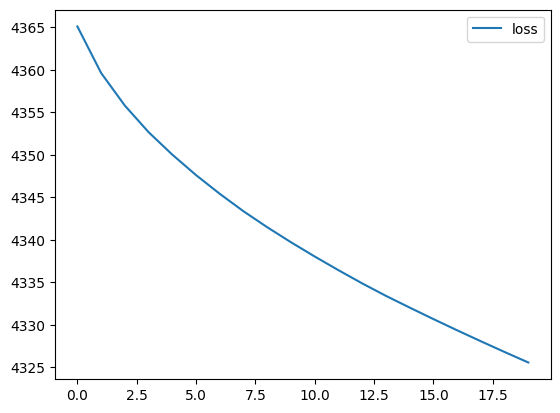

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('exp no 1').sheet1
data=worksheet.get_all_values()
print(data)

dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})

import pandas as pd


from sklearn.model_selection import train_test_split

X = dataset1[['Input']].values
y = dataset1[['Output']].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()


Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)

ai_brain =Sequential([
    Dense(units = 5,activation = 'relu',input_shape = [1]),
    Dense(units = 3,activation = 'relu'),
    Dense(units = 4,activation = 'relu'),
    Dense(units = 1)
])
ai_brain.compile(optimizer='rmsprop',loss='mse')

ai_brain.fit(X_train1,y_train,epochs=20)

loss_df = pd.DataFrame(ai_brain.history.history)

loss_df.plot()


X_test1 = Scaler.transform(X_test)


ai_brain.evaluate(X_test1,y_test)


X_n1 = [[30]]


X_n1_1 = Scaler.transform(X_n1)


ai_brain.predict(X_n1_1)
